In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_ideal = pd.read_excel('/content/Ideal_All.xlsx')

df_AB = pd.read_excel('/content/Fault_AB.xlsx')
df_BC = pd.read_excel('/content/Fault_BC.xlsx')
df_AC = pd.read_excel('/content/Fault_AC.xlsx')

df_AG = pd.read_excel('/content/Fault_AG.xlsx')
df_BG = pd.read_excel('/content/Fault_BG.xlsx')
df_CG = pd.read_excel('/content/Fault_CG.xlsx')

df_ABG = pd.read_excel('/content/Fault_ABG.xlsx')
df_BCG = pd.read_excel('/content/Fault_BCG.xlsx')
df_ACG = pd.read_excel('/content/Fault_ACG.xlsx')

df_ABC = pd.read_excel('/content/Fault_ABC.xlsx')
df_ABCG = pd.read_excel('/content/Fault_ABCG.xlsx')
df_No = pd.read_excel('/content/Fault_No.xlsx')

In [ ]:
df_AB.head()

,A,B,C,Distance
0,-683.2417,-9886.5,10570.0,0
1,803.2039,-10617.0,9813.5,0
2,2272.4000,-11189.0,8916.6,0
3,3710.0000,-11584.0,7873.5,0
4,5088.4000,-11790.0,6701.9,0


In [ ]:
#df_ideal['Type'] = 'ideal'
df_AB['Type'] = 'AB'
df_BC['Type'] = 'BC'
df_AC['Type'] = 'AC'
df_AG['Type'] = 'AG'
df_BG['Type'] = 'BG'
df_CG['Type'] = 'CG'
df_ABG['Type'] = 'ABG'
df_BCG['Type'] = 'BCG'
df_ACG['Type'] = 'ACG'
df_ABC['Type'] = 'ABC'
df_ABCG['Type'] = 'ABCG'
df_No['Type'] = 'No'

df_AllFaults = pd.concat([df_AB,df_BC,df_AC,df_AG,df_BG,df_CG,df_ABG,df_BCG,df_ACG,df_ABC,df_ABCG,df_No], ignore_index=True)


In [ ]:
df_AllFaults['Va_error'] = np.abs(df_AllFaults['A']-df_ideal['A'])
df_AllFaults['Vb_error'] = np.abs(df_AllFaults['B']-df_ideal['B'])
df_AllFaults['Vc_error'] = np.abs(df_AllFaults['C']-df_ideal['C'])

In [ ]:
df_AllFaults.head()

,A,B,C,Distance,Type,Va_error,Vb_error,Vc_error
0,-683.2417,-9886.5,10570.0,0,AB,1.2361,1.1,3.0
1,803.2039,-10617.0,9813.5,0,AB,0.0928,1.0,0.8
2,2272.4000,-11189.0,8916.6,0,AB,0.8000,2.0,2.5
3,3710.0000,-11584.0,7873.5,0,AB,2.7000,1.0,4.2
4,5088.4000,-11790.0,6701.9,0,AB,0.3000,1.0,0.3


In [ ]:
fault_types = df_AllFaults['Type'].unique()
print(fault_types)

['AB' 'BC' 'AC' 'AG' 'BG' 'CG' 'ABG' 'BCG' 'ACG' 'ABC' 'ABCG' 'No']


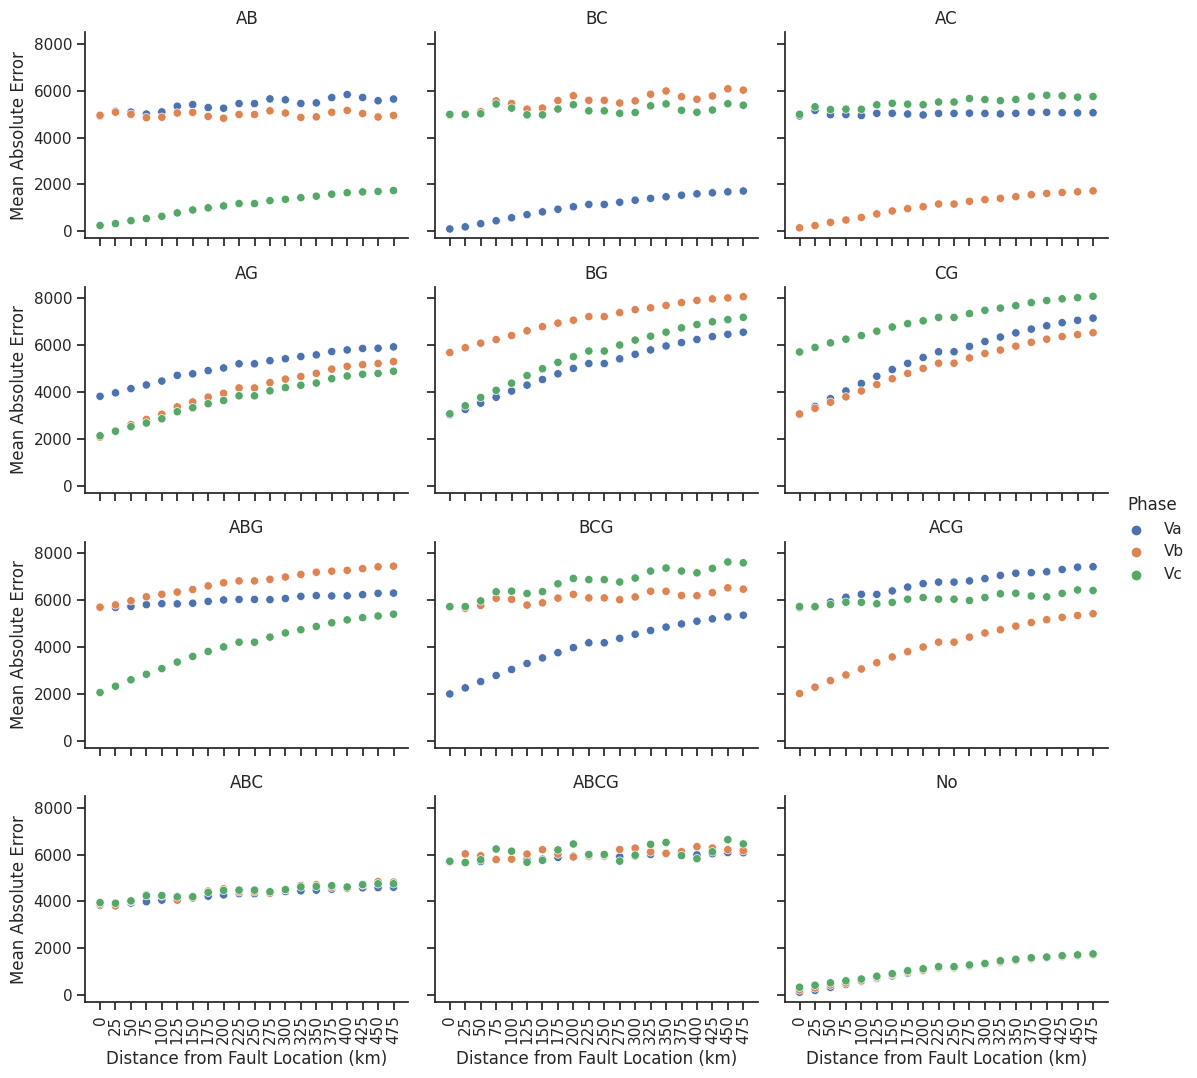

In [71]:
# empty df to store mean values for all fault types
all_mean_df = pd.DataFrame()

for fault_type in fault_types:
    df_fault = df_AllFaults.loc[df_AllFaults['Type'] == fault_type]
    fault_types_0 = df_fault['Distance'].unique()
    mean_values = {}

    for fault_dist in fault_types_0:
        for phase in ['Va', 'Vb', 'Vc']:
            mean_values[f'{fault_dist}_{phase}'] = df_fault.loc[df_fault['Distance'] == fault_dist, f'{phase}_error'].mean()

    mean_df = pd.DataFrame(mean_values.items(), columns=['Type', 'Mean Absolute Error'])
    mean_df[['Fault_Distance', 'Phase']] = mean_df['Type'].str.split('_', expand=True)
    mean_df['Fault_Type'] = fault_type
    all_mean_df = pd.concat([all_mean_df, mean_df])

# Plotting using seaborn
sns.set(style='ticks')
g = sns.relplot(data=all_mean_df, x='Fault_Distance', hue='Phase', y='Mean Absolute Error',
                col='Fault_Type', col_wrap=3, kind='scatter', height=2.7, aspect=1.4)

for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=90)


g.set_titles(col_template="{col_name}")
g.set_axis_labels('Distance from Fault Location (km)', 'Mean Absolute Error')
plt.savefig('distance_all_faults.pdf', dpi=300, bbox_inches="tight")
plt.grid
plt.show()